In [ ]:
#Практика из 12.1.1

In [ ]:
import pandas as pd
import numpy as np
import scipy
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
#keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot

%matplotlib inline

In [ ]:
path = 'http://raw.githubusercontent.com/jbrownlee/Datasets/master/banknote_authentication.csv'

df = pd.read_csv(path, header = None)
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [ ]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
df.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [ ]:
df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

In [ ]:
#Создаем X и y
X, y = df.values[:, :-1], df.values[:, -1]

In [ ]:
X = X.astype('float32')

In [ ]:
#кодирую y через LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)

In [ ]:
#сверка размерностей Х и у
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 4)
(343, 4)
(1029,)
(343,)


Epoch 1/20
52/52 [==============================] - 1s 4ms/step - loss: 0.7268 - val_loss: 0.5237
Epoch 2/20
52/52 [==============================] - 0s 2ms/step - loss: 0.4353 - val_loss: 0.3624
Epoch 3/20
52/52 [==============================] - 0s 2ms/step - loss: 0.3027 - val_loss: 0.2454
Epoch 4/20
52/52 [==============================] - 0s 2ms/step - loss: 0.1885 - val_loss: 0.1405
Epoch 5/20
52/52 [==============================] - 0s 2ms/step - loss: 0.1179 - val_loss: 0.0898
Epoch 6/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0782 - val_loss: 0.0588
Epoch 7/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0552 - val_loss: 0.0429
Epoch 8/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0415 - val_loss: 0.0326
Epoch 9/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0326 - val_loss: 0.0256
Epoch 10/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0262 - val_loss: 0.0208
Epoch 11/20
52/52 [

NameError: name 'pytplot' is not defined

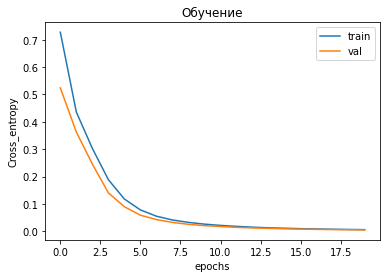

In [ ]:
n_features = X.shape[1]
model = Sequential()
#слои
model.add(Dense(20, activation='relu', input_shape=(n_features,) ))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Компилируем модель
model.compile(optimizer='adam', loss = 'binary_crossentropy')
#обучение модели
history = model.fit(X_train, y_train,
                    epochs = 20,
                    batch_size=20,
                    verbose = 1,
                    validation_data = (X_test, y_test))
#predict test_set
yhat = (model.predict(X_test) > 0.5).astype("int32")

#Validation
score = accuracy_score(y_test, yhat)
print('Accuracy', score)

#визуализаия процесса обучения по х эпохи, а по у ошибка(бинарная кроссэнтропия)
pyplot.title('Обучение')
pyplot.xlabel('epochs')
pyplot.ylabel('Сross_entropy')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label = 'val')
pyplot.legend()
pytplot.show()


Epoch 1/20
62/62 [==============================] - 1s 4ms/step - loss: 0.8072 - val_loss: 0.5165
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.4566 - val_loss: 0.3769
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.3302 - val_loss: 0.2684
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.2281 - val_loss: 0.1826
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1486 - val_loss: 0.1215
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0941 - val_loss: 0.0819
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0621 - val_loss: 0.0564
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0429 - val_loss: 0.0410
Epoch 9/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0304 - val_loss: 0.0295
Epoch 10/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0225 - val_loss: 0.0227
Epoch 11/20
62/62 [

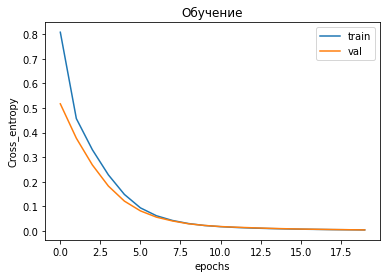

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 3ms/step - loss: 0.7213 - val_loss: 0.6050
Epoch 2/20
62/62 [==============================] - 0s 1ms/step - loss: 0.5215 - val_loss: 0.4102
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.3558 - val_loss: 0.2434
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.2139 - val_loss: 0.1294
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1187 - val_loss: 0.0710
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0705 - val_loss: 0.0428
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0457 - val_loss: 0.0284
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0319 - val_loss: 0.0183
Epoch 9/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.0138
Epoch 10/20
62/62 [==============================] - 0s 2ms/step - loss: 0.01

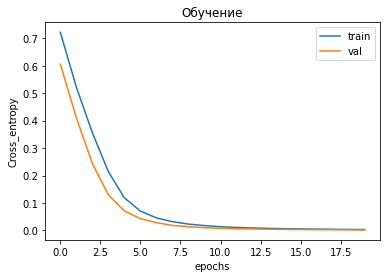

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 3ms/step - loss: 0.4062 - val_loss: 0.2946
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1910 - val_loss: 0.1770
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1095 - val_loss: 0.1198
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0683 - val_loss: 0.0814
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0437 - val_loss: 0.0560
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0290 - val_loss: 0.0402
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0206 - val_loss: 0.0312
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0155 - val_loss: 0.0254
Epoch 9/20
62/62 [==============================] - 0s 1ms/step - loss: 0.0120 - val_loss: 0.0204
Epoch 10/20
62/62 [==============================] - 0s 1ms/step - loss: 0.00

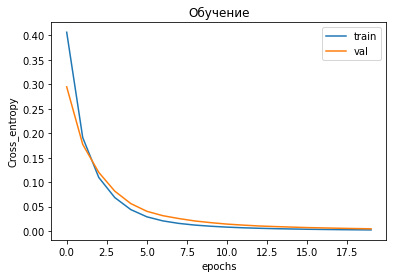

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 4ms/step - loss: 0.5666 - val_loss: 0.4435
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.3412 - val_loss: 0.2589
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1938 - val_loss: 0.1377
Epoch 4/20
62/62 [==============================] - 0s 1ms/step - loss: 0.1105 - val_loss: 0.0798
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0670 - val_loss: 0.0455
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0418 - val_loss: 0.0311
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.0216
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.0163
Epoch 9/20
62/62 [==============================] - 0s 1ms/step - loss: 0.0186 - val_loss: 0.0129
Epoch 10/20
62/62 [==============================] - 0s 1ms/step - loss: 0.01

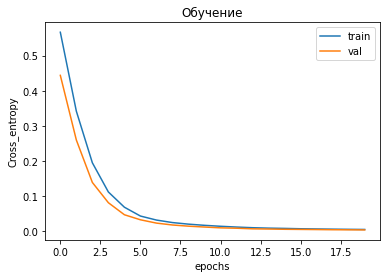

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 4ms/step - loss: 0.9321 - val_loss: 0.5966
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.4590 - val_loss: 0.3451
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.2337 - val_loss: 0.1919
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1187 - val_loss: 0.1131
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0696 - val_loss: 0.0765
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0449 - val_loss: 0.0545
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0306 - val_loss: 0.0384
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.0293
Epoch 9/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0166 - val_loss: 0.0228
Epoch 10/20
62/62 [==============================] - 0s 2ms/step - loss: 0.01

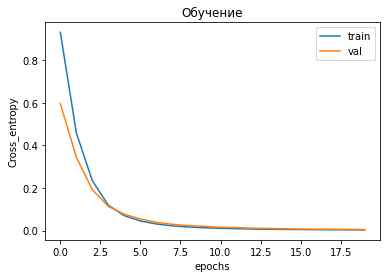

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 3ms/step - loss: 0.5736 - val_loss: 0.3943
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.3141 - val_loss: 0.2383
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1851 - val_loss: 0.1485
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1185 - val_loss: 0.0999
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0792 - val_loss: 0.0703
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0545 - val_loss: 0.0519
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0391 - val_loss: 0.0400
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0292 - val_loss: 0.0301
Epoch 9/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0226 - val_loss: 0.0250
Epoch 10/20
62/62 [==============================] - 0s 2ms/step - loss: 0.01

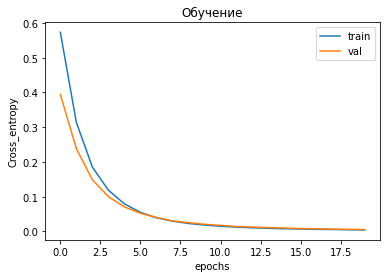

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 3ms/step - loss: 0.6626 - val_loss: 0.3488
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.2628 - val_loss: 0.1587
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.0865
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0939 - val_loss: 0.0514
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0617 - val_loss: 0.0304
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0419 - val_loss: 0.0198
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0302 - val_loss: 0.0145
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0230 - val_loss: 0.0107
Epoch 9/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0084
Epoch 10/20
62/62 [==============================] - 0s 2ms/step - loss: 0.01

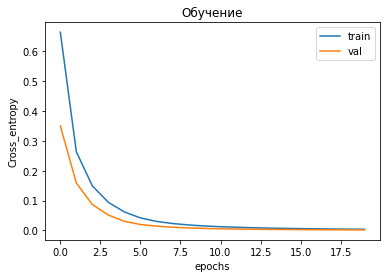

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 3ms/step - loss: 1.0482 - val_loss: 0.6696
Epoch 2/20
62/62 [==============================] - 0s 1ms/step - loss: 0.5889 - val_loss: 0.4868
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.4747 - val_loss: 0.4044
Epoch 4/20
62/62 [==============================] - 0s 1ms/step - loss: 0.3669 - val_loss: 0.2329
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1793 - val_loss: 0.1085
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1125 - val_loss: 0.0648
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0725 - val_loss: 0.0384
Epoch 8/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0486 - val_loss: 0.0251
Epoch 9/20
62/62 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0133
Epoch 10/20
62/62 [==============================] - 0s 2ms/step - loss: 0.01

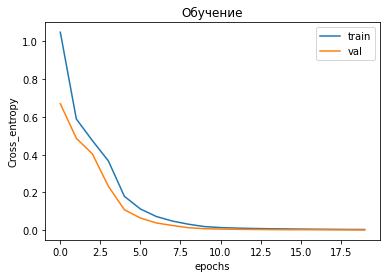

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 3ms/step - loss: 0.5934 - val_loss: 0.4371
Epoch 2/20
62/62 [==============================] - 0s 1ms/step - loss: 0.3745 - val_loss: 0.2882
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.2461 - val_loss: 0.1712
Epoch 4/20
62/62 [==============================] - 0s 1ms/step - loss: 0.1584 - val_loss: 0.1100
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1071 - val_loss: 0.0736
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0752 - val_loss: 0.0502
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0550 - val_loss: 0.0328
Epoch 8/20
62/62 [==============================] - 0s 1ms/step - loss: 0.0394 - val_loss: 0.0217
Epoch 9/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0280 - val_loss: 0.0139
Epoch 10/20
62/62 [==============================] - 0s 2ms/step - loss: 0.01

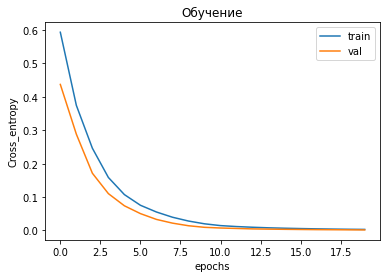

Средняя точность при кросс валидации 1.0
Epoch 1/20
62/62 [==============================] - 1s 3ms/step - loss: 0.5405 - val_loss: 0.3724
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.2680 - val_loss: 0.2148
Epoch 3/20
62/62 [==============================] - 0s 2ms/step - loss: 0.1470 - val_loss: 0.1175
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0793 - val_loss: 0.0766
Epoch 5/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0510 - val_loss: 0.0547
Epoch 6/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0364 - val_loss: 0.0417
Epoch 7/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0269 - val_loss: 0.0333
Epoch 8/20
62/62 [==============================] - 0s 1ms/step - loss: 0.0210 - val_loss: 0.0264
Epoch 9/20
62/62 [==============================] - 0s 1ms/step - loss: 0.0165 - val_loss: 0.0222
Epoch 10/20
62/62 [==============================] - 0s 1ms/step - loss: 0.01

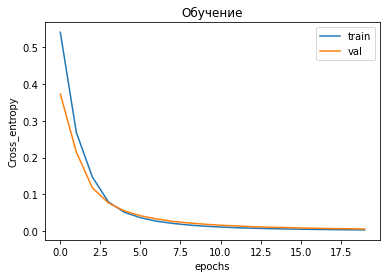

Средняя точность при кросс валидации 1.0


In [ ]:
###Кросс-валидация
k_fold = StratifiedKFold(10)
scores = [] #список для метрик
for train_ix, test_ix in k_fold.split(X,y):
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    n_features = X.shape[1]
    model = Sequential()
    #слои
    model.add(Dense(20, activation='relu', input_shape=(n_features,) ))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #Компилируем модель
    model.compile(optimizer='adam', loss = 'binary_crossentropy')
    #обучение модели
    history = model.fit(X_train, y_train,
                        epochs = 20,
                        batch_size=20,
                        verbose = 1,
                        validation_data = (X_test, y_test))
    #predict test_set
    yhat = (model.predict(X_test) > 0.5).astype("int32")

    #Validation
    score = accuracy_score(y_test, yhat)
    print('Accuracy', score)

    #визуализаия процесса обучения по х эпохи, а по у ошибка(бинарная кроссэнтропия)
    pyplot.title('Обучение')
    pyplot.xlabel('epochs')
    pyplot.ylabel('Сross_entropy')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label = 'val')
    pyplot.legend()
    pyplot.show()

    scores.append(score)
    print('Средняя точность при кросс валидации', (np.mean(scores)))